## [Example MeanShift from Sklearn](https://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html)
[How it works](https://scikit-learn.org/stable/modules/clustering.html#mean-shift)

In [1]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth, AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import pickle

## Number the ingredients 

In [2]:
ingredients = ['mixed berries', 'peas', 'olive oil', 'tortillas', 'lettuce', 'chicken breast', 'cardamom syrup', 'tamarind', 'cottage cheese', 'cauliflower', 'oats', 'graham cracker crust', 'rice', 'basmati rice', 'balsamic glaze', 'bell peppers', 'capers', 'garlic', 'salt', 'water', 'chicken broth', 'balsamic vinegar', 'almonds', 'masala spices', 'tzatziki sauce', 'semolina', 'balsamic vinaigrette', 'popcorn', 'pancetta', 'mushroom', 'cheese', 'peanut oil', 'heavy cream', 'raw fish', 'oranges', 'peanuts', 'sugar', 'teriyaki sauce', 'cilantro', 'chicken wings', 'tamarind chutney', 'seaweed', 'cucumbers', 'cabbage', 'sesame oil', 'curry leaves', 'strawberries', 'mixed fruits', 'cocoa powder', 'grilled chicken', 'onion', 'bbq sauce', 'honey', 'vegetable oil', 'mustard', 'soybeans', 'dill', 'beef', 'pectin', 'kidney beans', 'curry powder', 'tofu', 'croutons', 'mango', 'fish fillets', 'manchurian sauce', 'yogurt', 'greek yogurt', 'rice vinegar', 'fajita seasoning', 'mutton', 'vegetable broth', 'cardamom', 'lemon zest', 'potato masala', 'arborio rice', 'apples', 'red onion', 'pav bun', 'cocoa butter', 'creamy sauce', 'noodles', 'lemon', 'syrup', 'ground beef', 'puff pastry', 'brussels sprouts', 'soy sauce', 'emulsifiers', 'maple syrup', 'black beans', 'nutmeg', 'tomatoes', 'mayonnaise', 'vinegar', 'orange sauce', 'granola', 'butternut squash', 'phyllo dough', 'oil', 'potatoes', 'lemon juice', 'tandoori spices', 'coffee', 'milk powder', 'avocado', 'mustard seeds', 'ratatouille vegetables', 'mushrooms', 'lamb', 'alfredo sauce', 'coconut milk', 'pumpkin', 'baking powder', 'chicken', 'icing', 'sausage', 'mixed vegetables', 'pesto sauce', 'potato', 'mozzarella', 'curry paste', 'vinaigrette', 'herbs', 'corn syrup', 'cucumber', 'tikka masala sauce', 'pizza dough', 'goat cheese', 'raisins', 'shrimp', 'tikka masala', 'quinoa', 'celery', 'pumpkin spice', 'parmesan cheese', 'chocolate', 'sour cream', 'breadcrumbs', 'buffalo sauce', 'romaine lettuce', 'chickpeas', 'brandy', 'buttermilk', 'butter', 'feta cheese', 'rose water', 'satay sauce', 'graham crackers', 'saffron syrup', 'tuna', 'kashmiri red chili', 'miso paste', 'whipped cream', 'biryani masala', 'ladyfingers', 'flour', 'eggs', 'tomato sauce', 'vegetables', 'mozzarella cheese', 'milk solids', 'shawarma spices', 'nuts', 'salmon', 'pork ribs', 'lime juice', 'egg', 'poppy seeds', 'shortcake', 'ham', 'kulcha bread', 'basil', 'lentil dumplings', 'salmon fillet', 'zucchini', 'ground meat', 'paneer', 'burrito seasoning', 'creamy tomato sauce', 'coconut oil', 'taco seasoning', 'lobster', 'sweet potatoes', 'spinach', 'blueberries', 'cocoa', 'bananas', 'lemon pepper seasoning', 'sushi rice', 'cod', 'caesar dressing', 'paprika', 'wheat flour', 'shawarma seasoning', 'bacon', 'cinnamon', 'marshmallows', 'portobello mushrooms', 'brown sugar', 'peanut butter', 'carrots', 'bread crumbs', 'dough', 'berries', 'beef broth', 'raspberries', 'ginger', 'chutney', 'pineapple', 'mascarpone cheese', 'enchilada sauce', 'cookies', 'fish', 'vanilla pudding mix', 'mint', 'marinara sauce', 'spices', 'fresh tomatoes', 'prawns', 'pastry', 'burger bun', 'pecans', 'almond milk', 'tomato broth', 'curry spices', 'pasta', 'caramel', 'nori ', 'lime', 'ghee', 'cream cheese', 'brie cheese', 'coffee liqueur', 'pepper', 'watermelon', 'fermented batter', 'bread', 'onions', 'olives', 'pav bread', 'cream', 'milk', 'vanilla extract', 'spiced water', 'turmeric', 'lentils', 'chole masala', 'eggplant', 'chili powder', 'seasonings', 'chocolate chips', 'pistachios', 'quail eggs', 'mango chutney', 'pomegranate seeds', 'provolone cheese', 'truffle oil', 'cranberry sauce', 'pesto aioli', 'sun-dried tomatoes', 'artichoke hearts', 'dijon mustard', 'coconut flakes', 'red curry paste', 'garam masala', 'gruyère cheese', 'anchovies', 'sourdough bread', 'sherry vinegar', 'tofu noodles', 'raspberry jam', 'bourbon', 'cilantro pesto', 'ghee-infused butter', 'smoked paprika', 'cashews', 'maple-glazed bacon', 'wasabi paste', 'hoisin sauce', 'prosciutto', 'lemon thyme', 'raspberry vinaigrette', 'szechuan peppercorns', 'red wine', 'bok choy', 'harissa paste', 'caramelized onions', 'dried figs', 'champagne vinegar', 'goat milk', 'sriracha sauce', 'chia seeds', 'saffron threads', 'cumin seeds', 'hazelnuts', 'champagne', 'brown rice', 'kimchi', 'za\'atar spice blend', 'tarragon', 'sweet chili sauce']

In [3]:
len(ingredients)

302

## Make sample blobs

we will need one coord space for each ingredient type to be considered

In [5]:
X, _, centers = make_blobs(n_samples=600, n_features=302, centers=4, cluster_std=0.5, center_box=(0, 1), return_centers=True) 
# how many features do I need, what range of values makes sense?
centers

array([[0.64124003, 0.28845338, 0.90714635, ..., 0.9158062 , 0.49371293,
        0.12785783],
       [0.00218178, 0.19075801, 0.22034296, ..., 0.02100608, 0.98233639,
        0.49926384],
       [0.2829895 , 0.28544195, 0.48966498, ..., 0.56206183, 0.84969563,
        0.2451223 ],
       [0.48331297, 0.03613609, 0.31046443, ..., 0.03005339, 0.45739892,
        0.13802147]])

In [6]:
X = X.round()

In [7]:
X

array([[ 0., -0.,  1., ..., -0.,  0.,  1.],
       [-0.,  0.,  1., ...,  0.,  0., -0.],
       [-0., -0.,  0., ..., -0.,  1.,  1.],
       ...,
       [ 1.,  0.,  1., ...,  1.,  0.,  0.],
       [ 1.,  1.,  1., ...,  1.,  1.,  0.],
       [-0.,  0.,  0., ..., -0.,  1.,  1.]])

# Do PCA to flatten

In [8]:
pca = PCA(n_components=2)

In [9]:
pca.fit(X)

PCA(n_components=2)

In [10]:
pca_x = pca.transform(X)

# Do MeanShift 

In [11]:
bandwidth = estimate_bandwidth(pca_x, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(pca_x)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
print(cluster_centers)

number of estimated clusters : 4
[[-1.87051798 -2.59757786]
 [ 3.64730447 -1.82823556]
 [ 1.24304737  3.55685769]
 [-2.95499537  0.91768724]]


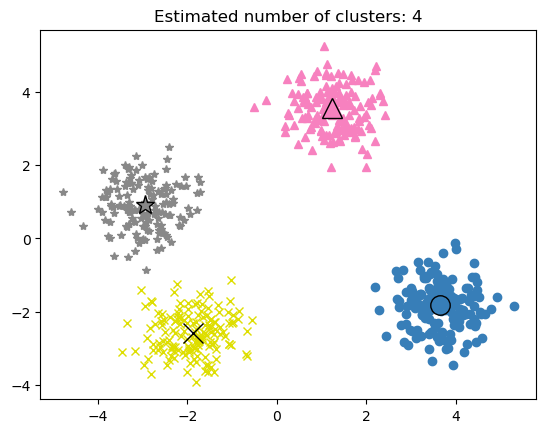

In [12]:
plt.figure(1)
plt.clf()

colors = ["#dede00", "#377eb8", "#f781bf", "#888"]
markers = ["x", "o", "^", "*"]

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(pca_x[my_members, 0], pca_x[my_members, 1], markers[k], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

## Pickle what we wanna save

In [13]:
with open("model.pkl", "wb") as f:
    pickle.dump(ms, f)

In [14]:
with open("pca_model.pkl", "wb") as f:
    pickle.dump(pca, f)

## Make a piece of sample data to test this with

In [15]:
def fix_size(likes):
    adjusted = [0]*302
    for like in likes:
        adjusted[ingredients.index(like)] = 1
    return adjusted

In [16]:
def to_ingredients(cluster):
    converted = []
    for point in cluster:
        converted_i = []
        for val in point:
            converted_i.append(ingredients[list(point).index(val)])
        converted.append(list(set(converted_i)))
    return converted
    # return list(map(lambda y: list(map(lambda x: ingredients[cluster.index(x)], y)), cluster))

In [17]:
alice_from_twilight = {
    "likes" : ["raw fish", "coffee", "lamb"],
    "dislikes" : ["garlic", "rose water"]
}

In [18]:
alice_from_twilight["likes"] = fix_size(alice_from_twilight["likes"])

In [19]:
alice_pca = pca.transform([alice_from_twilight["likes"]])

In [20]:
alice_pca

array([[ 0.32505576, -0.8970924 ]])

In [21]:
ms.predict(alice_pca) # this should be the triangle group, which seems right

array([0])

In [22]:
in_cluster_with_alice = [
    X[i] for i, c in enumerate(ms.labels_)
]

In [23]:
cluster_2_ingredients = to_ingredients(in_cluster_with_alice)

In [24]:
cluster_2_ingredients[:5]

[['mixed berries', 'salt', 'cardamom', 'olive oil'],
 ['mixed berries', 'curry leaves', 'olive oil', 'cheese'],
 ['mixed berries', 'brussels sprouts', 'raw fish', 'lettuce'],
 ['mixed berries', 'balsamic glaze', 'cucumbers', 'peas'],
 ['mixed berries', 'lettuce', 'water', 'peas']]

In [25]:
alice_recs = []
for profile in cluster_2_ingredients:
    for i in profile:
        if (i not in alice_recs and i not in alice_from_twilight["dislikes"]):
            alice_recs.append(i)
alice_recs

['mixed berries',
 'salt',
 'cardamom',
 'olive oil',
 'curry leaves',
 'cheese',
 'brussels sprouts',
 'raw fish',
 'lettuce',
 'balsamic glaze',
 'cucumbers',
 'peas',
 'water',
 'cottage cheese',
 'arborio rice',
 'sweet chili sauce',
 'chicken broth',
 'oats',
 'manchurian sauce',
 'cardamom syrup',
 'syrup',
 'tzatziki sauce',
 'balsamic vinaigrette',
 'noodles',
 'oranges',
 'tortillas',
 'bell peppers',
 'mushroom',
 'sesame oil',
 'dill',
 'grilled chicken',
 'chicken breast',
 'honey',
 'chicken',
 'sugar',
 'cauliflower',
 'pancetta',
 'mozzarella cheese',
 'orange sauce',
 'cilantro',
 'semolina',
 'strawberries',
 'popcorn',
 'bbq sauce',
 'cocoa powder',
 'mixed vegetables',
 'teriyaki sauce',
 'red onion',
 'almonds',
 'peanuts',
 'graham cracker crust',
 'capers',
 'tamarind',
 'vegetable oil',
 'fish fillets',
 'masala spices',
 'marinara sauce',
 'tamarind chutney',
 'basmati rice',
 'tomato sauce',
 'peanut oil',
 'tomatoes',
 'mango',
 'balsamic vinegar',
 'cabbage',